In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# P in millibars, T in K, wl in nm
def delta_n(P, T, wl):
    return 77.6*1e-6*(1+7.52e-3*(wl/1e3)**(-2))*P/T

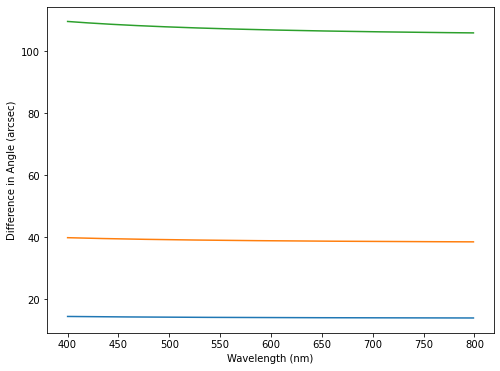

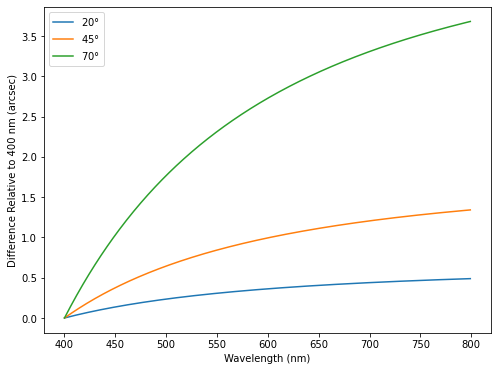

In [54]:
wl_range = np.arange(400,800,1)
wl_n = delta_n(650, 273, wl_range)

disp_20 = (20*np.pi/180-np.arcsin(np.sin(20*np.pi/180)/(wl_n+1)))*180/np.pi*3600
disp_45 = (45*np.pi/180-np.arcsin(np.sin(45*np.pi/180)/(wl_n+1)))*180/np.pi*3600
disp_70 = (70*np.pi/180-np.arcsin(np.sin(70*np.pi/180)/(wl_n+1)))*180/np.pi*3600

plt.figure(figsize=(8,6))

plt.plot(wl_range, disp_20, label='20$\degree$')
plt.plot(wl_range, disp_45, label='45$\degree$')
plt.plot(wl_range, disp_70, label='70$\degree$')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Difference in Angle (arcsec)')

plt.savefig('absolute_diff.pdf', bbox_inches='tight')

plt.show()

plt.figure(figsize=(8,6))

plt.plot(wl_range, disp_20[0]-disp_20, label='20$\degree$')
plt.plot(wl_range, disp_45[0]-disp_45, label='45$\degree$')
plt.plot(wl_range, disp_70[0]-disp_70, label='70$\degree$')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Difference Relative to 400 nm (arcsec)')
plt.legend(loc='best')

plt.savefig('relative_diff.pdf', bbox_inches='tight')

plt.show()

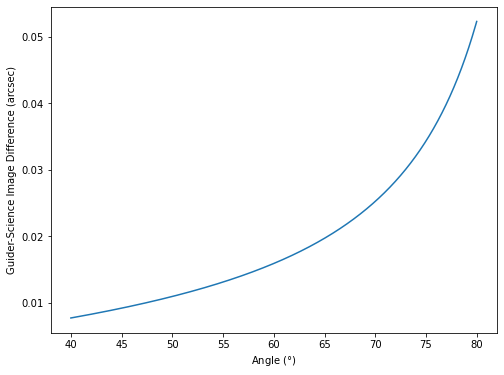

In [53]:
g_n = 1+delta_n(650, 273, 700)
k_n = 1+delta_n(650, 273, 2200)

ang = np.arange(40,80,0.01)*np.pi/180

diff = np.arcsin(np.sin(ang)*g_n)-np.arcsin(np.sin(ang)*k_n)

plt.figure(figsize=(8,6))

plt.plot(ang*180/np.pi, diff*3600)

plt.xlabel('Angle ($\degree$)')
plt.ylabel('Guider-Science Image Difference (arcsec)')

plt.savefig('guider_science.pdf', bbox_inches='tight')

plt.show()